## Exercise 1

### **Data Generation Task:** 

Generate two classes of 2D data points (1000 samples per class) using multivariate normal distributions. Use the following parameters:  

- Class 0:

    Mean = $[2, 2]$,
    
    Covariance matrix = $[[0.5, 0], [0, 0.5]]$ (i.e., variance of $0.5$ along each dimension, no covariance).  

- Class 1:

    Mean = $[5, 5]$,
    
    Covariance matrix = $[[0.5, 0], [0, 0.5]]$.  

These parameters ensure the classes are mostly linearly separable, with minimal overlap due to the distance between means and low variance. Plot the data points (using libraries like matplotlib if desired) to visualize the separation, coloring points by class.

### **Perceptron Implementation Task:**

Implement a single-layer perceptron from scratch to classify the generated data into the two classes. You may use NumPy only for basic linear algebra operations (e.g., matrix multiplication, vector addition/subtraction, dot products). Do not use any pre-built machine learning libraries (e.g., no scikit-learn) or NumPy functions that directly implement perceptron logic.  

- Initialize weights (w) as a 2D vector (plus a bias term b).  
- Use the perceptron learning rule: For each misclassified sample $(x, y)$, update $w = w + η * y * x$ and $b = b + η * y$, where $η$ is the learning rate (start with $η=0.01$).  
- Train the model until convergence (no weight updates occur in a full pass over the dataset) or for a maximum of 100 epochs, whichever comes first. If convergence is not achieved by 100 epochs, report the accuracy at that point. Track accuracy after each epoch.  
- After training, evaluate accuracy on the full dataset and plot the decision boundary (line defined by $w·x + b = 0$) overlaid on the data points. Additionally, plot the training accuracy over epochs to show convergence progress. Highlight any misclassified points in a separate plot or by different markers in the decision boundary plot.  

Report the final weights, bias, accuracy, and discuss why the data's separability leads to quick convergence.

***

In [84]:
import numpy as np

np.random.seed(42)

w = np.random.randn(2,)
b = 0

alpha = 0.01

def update(w, alpha, y, x, b):
    return w + alpha * y * x, b + alpha * y

def activation_func(y):
    return np.where(y >= 0, 1, -1)

def predict(x, w, b):
    y_ = x@w + b
    return y_ 

Dataset shape: (1000, 2)


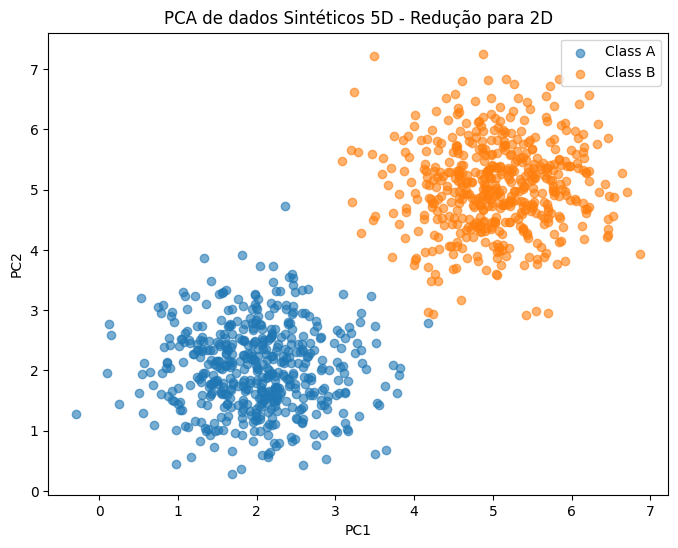

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(42)

mu_A = [2, 2]
Sigma_A = np.array([
    [0.5, 0.0],
    [0.0, 0.5]
])

mu_B = [5, 5]
Sigma_B = np.array([
    [0.5, 0.0],
    [0.0, 0.5]
])

class_A = np.random.multivariate_normal(mu_A, Sigma_A, size=500)
class_B = np.random.multivariate_normal(mu_B, Sigma_B, size=500)

X = np.vstack((class_A, class_B))
y = np.array([0]*500 + [1]*500)

print("Dataset shape:", X.shape)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], alpha=0.6, label="Class A")
plt.scatter(X[y==1, 0], X[y==1, 1], alpha=0.6, label="Class B")
plt.title("PCA de dados Sintéticos 5D - Redução para 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


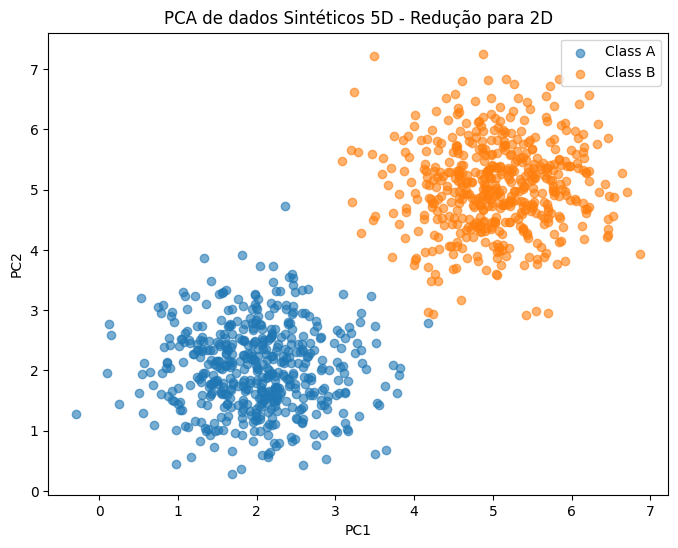

In [90]:
epochs = 1000

for _ in range(epochs):
    
    y_ = activation_func(predict(X, w, b))   
    
    
    if np.all(y == y_):
        break
    
    for i in range(len(y)):
        
        if y_[i] != 0:
        
            x_i = X[i]
            y_i = y[i]
            
            w, b = update(w, alpha, y_i, x_i, b)

np.mean((y - y_) ** 2)


plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], alpha=0.6, label="Class A")
plt.scatter(X[y==1, 0], X[y==1, 1], alpha=0.6, label="Class B")
plt.plot()
plt.title("PCA de dados Sintéticos 5D - Redução para 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()




## Exercise 2

### **Data Generation Task:**  

Generate two classes of 2D data points (1000 samples per class) using multivariate normal distributions. Use the following parameters:

- Class 0:

    Mean = $[3, 3]$,

    Covariance matrix = $[[1.5, 0], [0, 1.5]]$ (i.e., higher variance of 1.5 along each dimension).

- Class 1:

    Mean = $[4, 4]$,

    Covariance matrix = $[[1.5, 0], [0, 1.5]]$.  

These parameters create partial overlap between classes due to closer means and higher variance, making the data not fully linearly separable. Plot the data points to visualize the overlap, coloring points by class.

### **Perceptron Implementation Task:**  

Using the same implementation guidelines as in Exercise 1, train a perceptron on this dataset.  

- Follow the same initialization, update rule, and training process.  
- Train the model until convergence (no weight updates occur in a full pass over the dataset) or for a maximum of 100 epochs, whichever comes first. If convergence is not achieved by 100 epochs, report the accuracy at that point and note any oscillation in updates; consider reporting the best accuracy achieved over multiple runs (e.g., average over 5 random initializations). Track accuracy after each epoch.  
- Evaluate accuracy after training and plot the decision boundary overlaid on the data points. Additionally, plot the training accuracy over epochs to show convergence progress (or lack thereof). Highlight any misclassified points in a separate plot or by different markers in the decision boundary plot.  

Report the final weights, bias, accuracy, and discuss how the overlap affects training compared to Exercise 1 (e.g., slower convergence or inability to reach 100% accuracy).